# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

# 2. Remove dodgy images

In [1]:
import cv2
import imghdr
import os 

C:\Users\eslam\AppData\Local\Temp\ipykernel_10124\3712335943.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = 'Dataset' 

In [3]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# 3. Creating DataFrame

In [5]:
import numpy as np
import pandas as pan
import glob
import matplotlib.pyplot as plotter

In [6]:
files = [i for i in glob.glob(data_dir + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,Dataset\Trach Bin\AS_5321044_20200728_163023_j...,Dataset\Trach Bin
1,Dataset\Trach Bin\20200307_15_42_-937-750_-1_-...,Dataset\Trach Bin
2,Dataset\Trach Bin\179_jpg.rf.49bb8bd954e7bd889...,Dataset\Trach Bin
3,Dataset\Garbage\images8.jpg,Dataset\Garbage
4,Dataset\Garbage\i37.jpg,Dataset\Garbage
...,...,...
1877,Dataset\Garbage\i309.jpg,Dataset\Garbage
1878,Dataset\Garbage\i673.jpg,Dataset\Garbage
1879,Dataset\Trach Bin\AS_3291272_20200502_091144_j...,Dataset\Trach Bin
1880,Dataset\Garbage\i212.jpg,Dataset\Garbage


# 3. Visualizing Label Distribution

<Axes: xlabel='Label', ylabel='count'>

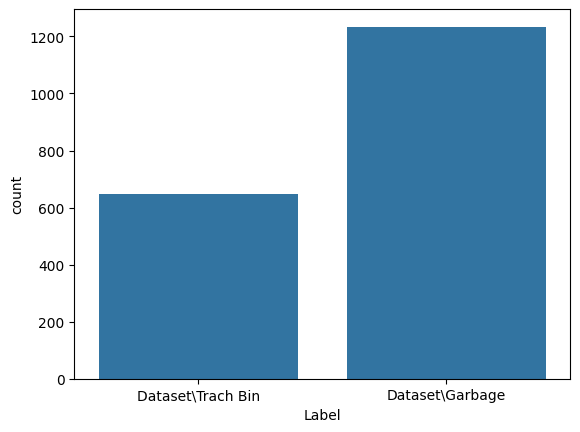

In [7]:
import seaborn as sns 
sns.countplot(x = dataframe["Label"])
# plotter.xticks(rotation = 0);

# 4. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [9]:
data = tf.keras.utils.image_dataset_from_directory('Dataset')

Found 1881 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

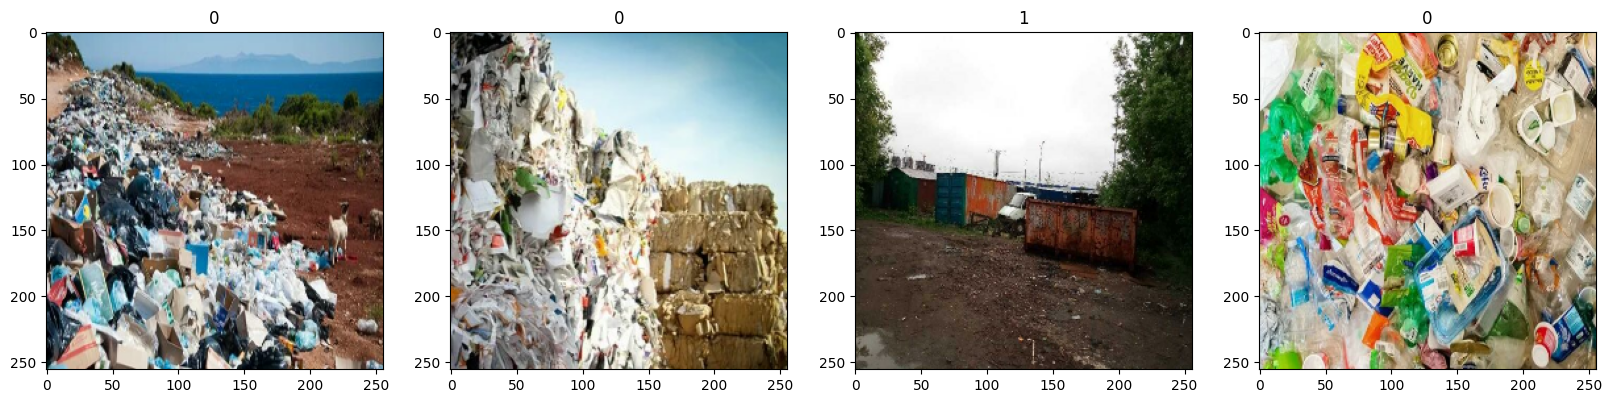

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 5. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9705882 , 0.9852941 , 1.        ],
          [0.98946077, 0.99338233, 0.9995098 ],
          [0.9375    , 0.9747549 , 0.96004903]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9551471 , 0.9764706 , 0.99558824],
          [0.97181374, 0.9845588 , 0.99485296],
          [0.925     , 0.9642157 , 0.9485294 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9372549 , 0.9651961 , 0.9875    ],
          [0.98259807, 0.99534315, 0.9992647 ],
          [0.9372549 , 0.9823529 , 0.9637255 ]],
 
         ...,
 
         [[0.11421569, 0.03970588, 0.0632353 ],
          [0.11127

# 6. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

41

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 7. Build Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\eslam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 8. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 414ms/step - accuracy: 0.6230 - loss: 0.7899 - val_accuracy: 0.8807 - val_loss: 0.2694
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 377ms/step - accuracy: 0.8656 - loss: 0.2929 - val_accuracy: 0.8949 - val_loss: 0.2393
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 367ms/step - accuracy: 0.9013 - loss: 0.2269 - val_accuracy: 0.8438 - val_loss: 0.4014
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 370ms/step - accuracy: 0.9129 - loss: 0.2172 - val_accuracy: 0.9290 - val_loss: 0.1658
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 375ms/step - accuracy: 0.9485 - loss: 0.1411 - val_accuracy: 0.9489 - val_loss: 0.1478
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 379ms/step - accuracy: 0.9750 - loss: 0.0763 - val_accuracy: 0.9432 - val_loss: 0.1556
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 383ms/step - accuracy: 0.9865 - loss: 0.0682 - val_accuracy: 0.9716 - val_loss: 0.1084
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 386ms/step - accuracy: 0.9885 - loss: 0.0466 - val_accu

# 9. Plot Performance

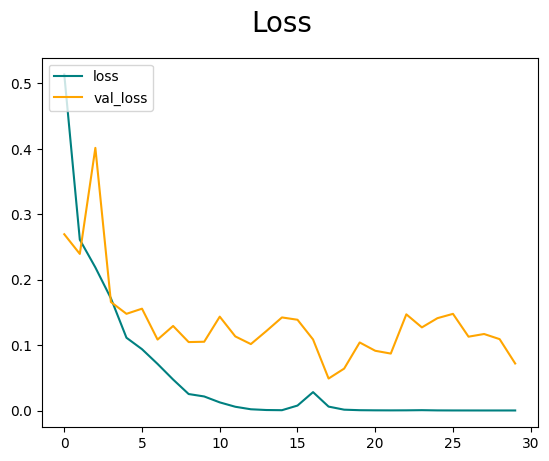

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

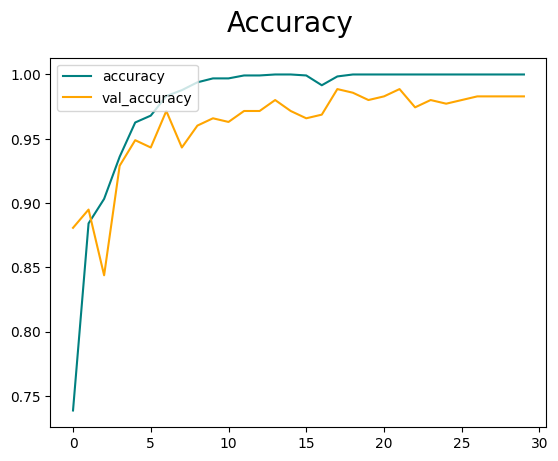

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 10. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8679245, shape=(), dtype=float32) tf.Tensor(0.9583333, shape=(), dtype=float32) tf.Tensor(0.94375, shape=(), dtype=float32)


# 11. Test

In [33]:
import cv2

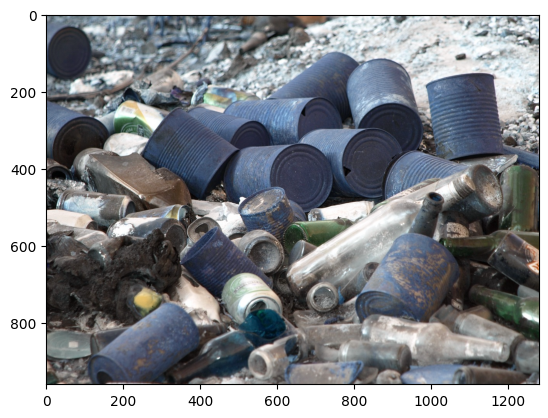

In [34]:
img = cv2.imread('test/garbage.jpg')
plt.imshow(img)
plt.show()

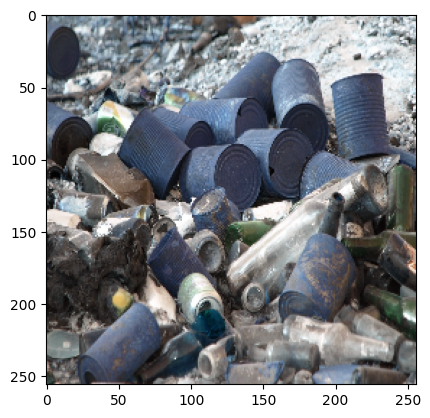

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


In [37]:
yhat

array([[6.3265e-08]], dtype=float32)

In [38]:
if yhat > 0.5: 
    print(f'Predicted class is Garbage')
else:
    print(f'Predicted class is Clean')

Predicted class is Clean


# 12. Save the Model

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save(os.path.join('models','imageclassifier.h5'))

In [41]:
new_model = load_model('models/imageclassifier.h5')

In [42]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[6.3265e-08]], dtype=float32)

# 13. Converting the Model to TFLite

In [ ]:
model =tf.keras.models.load_model("models/imageclassifier.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

open("models/imageclassifier.tflite", "wb").write(tflite_model)

